In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("kc_house_data.csv")

The first step is to get rid of all null values.

In [2]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [3]:
df.yr_renovated = df.yr_renovated.fillna(df.yr_renovated.median()) 

In [4]:
df.waterfront = df.waterfront.fillna(0.0)
df.waterfront = df.waterfront.astype(float)

The Sqft_Basement variable has a "?", which we can see from the following command:
    

In [5]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [6]:
df.sqft_basement = df.sqft_basement.replace('?', 0)
df.sqft_basement = df.sqft_basement.astype(float)

In [7]:
df.view = df.view.fillna(0.0)

The following command makes sure there are no null values: 

In [8]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Clear. Now, it's time to make sure everything is the right data type. 

From what we can see above, we need floors, waterfront, view, yr_renovated, lat, and long should be integers and not floats. 

In [9]:
df.floors = df.floors.astype(int)
df.waterfront = df.waterfront.astype(int)
df.view = df.view.astype(int)
df.yr_renovated = df.yr_renovated.astype(int)
df.lat = df.lat.astype(int)
df.long = df.long.astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null int64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null int64
long             21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(3), int64(17), object(1)
memory usage: 3.5+ MB


Now, I'll remove the "ID" variable. I'll also not be using lat + long, latitude because there is only one latitude.  

In [11]:
df.lat.unique()

array([47])

In [12]:
df = df.drop(["id"], axis=1)

In [13]:
df = df.drop(["lat"], axis=1)

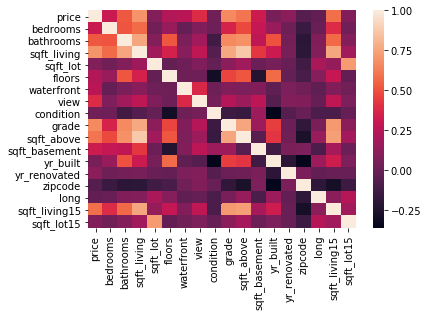

In [14]:
corr = df.corr()
sns.heatmap(corr)

#sns.heatmap(df)

Now the data is clean, it is time to check for multicollinearity between values. This means the likliehood that dependent variable perdicts another dependent variable (as opposed to the independent variable). To do that, a heat map will be used. Very light colors indicates high multicollinearity 


From this heat graph, it's clear that not all of the features will be used in the model. bathrooms and bedrooms and sqft_living is a good example, as is Floors is also very red.

It also appears that something is up with lat - from checking the unique values, it is clear that all of the houses in this county have the same latitute, which makes sense. It will be removed from the model. Same with id. 



Now, it's time explore the data - histograms will be made of each of the variables. 

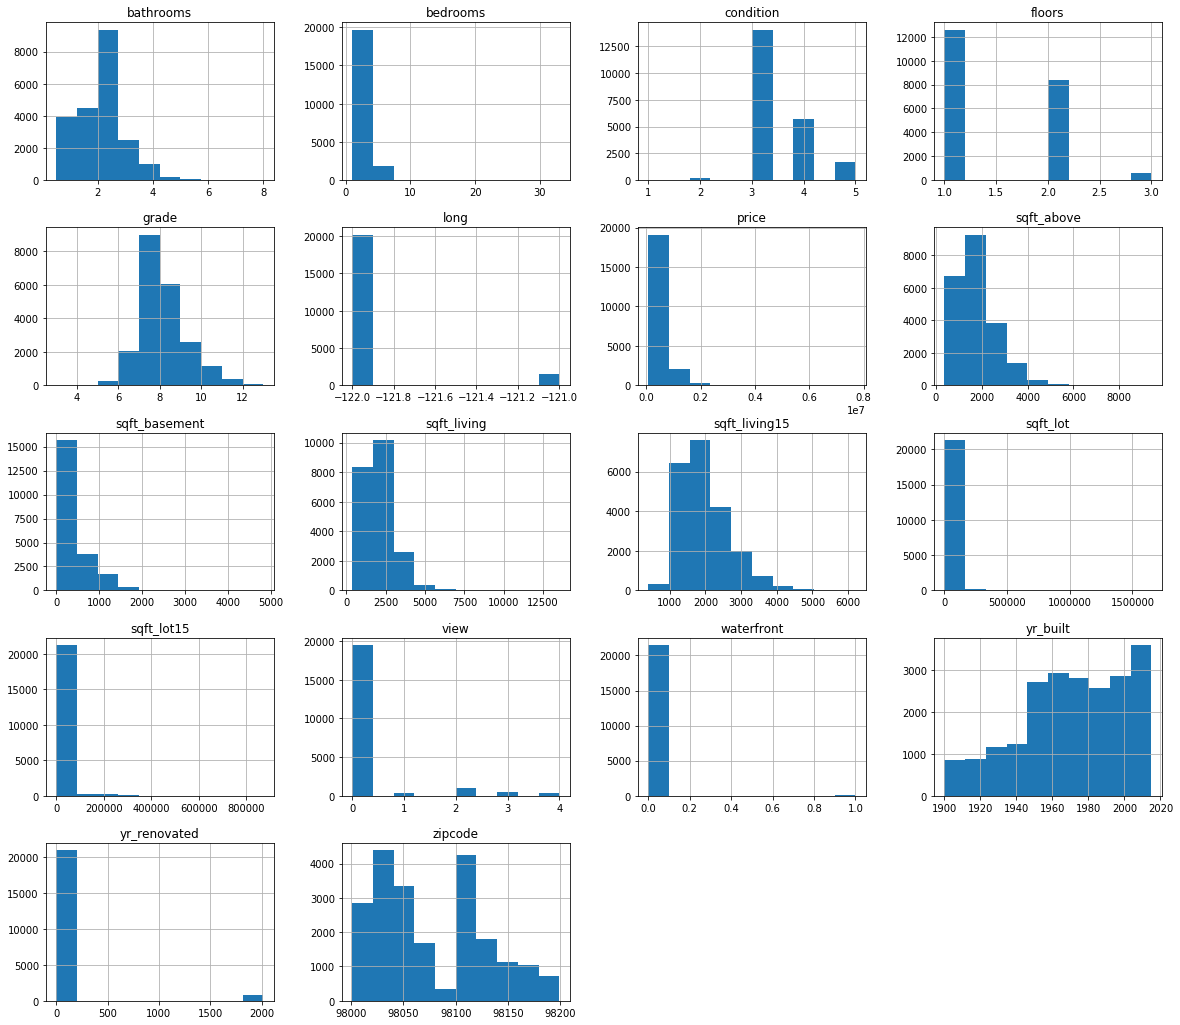

In [15]:
df.hist(figsize = (20,18));

From the histograms, it's clear that transformations need to be made, as well getting rid of outliers. "Bedrooms" is a clear example of outliers, "sqft_lot" is a good example of data that needs to be log transformed, and categorical variables such as "view" and "condition" will be min/maxed. 

Outliers:


In [16]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [17]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [18]:
df = df[df.bedrooms != 33]
df = df[df.bedrooms != 11]
df = df[df.bedrooms != 10]
df = df[df.bedrooms != 9]
df = df[df.bedrooms != 8]
df = df[df.bedrooms != 7]
df = df[df.bathrooms != 8]
df = df[df.bathrooms != 7.75]
df = df[df.bathrooms != 7.25]
df = df[df.bathrooms != 6.75]
df = df[df.bathrooms != 6.25]
df = df[df.bathrooms != 6.50]
df = df[df.bathrooms != 6.00]
df = df[df.bathrooms != 8.00]
df = df[df.bathrooms != 5.75]
df = df[df.bathrooms != 5.50]
df = df[df.bathrooms != 5.25]



Log Transformations:

In [19]:
df.sqft_living = np.log(df.sqft_living)
df.sqft_living15 = np.log(df.sqft_living15)
df.sqft_lot15 = np.log(df.sqft_lot15)
df.sqft_lot = np.log(df.sqft_lot)
df.sqft_above = np.log(df.sqft_above)
#df.sqft_basement = np.log(df.sqft_basement)
df.price = np.log(df.price)



Min Max Scaling: 

In [20]:
df.condition = (df.condition-min(df.condition))/(max(df.condition)-min(df.condition))	
df.view = (df.view-min(df.view))/(max(df.view)-min(df.view))	

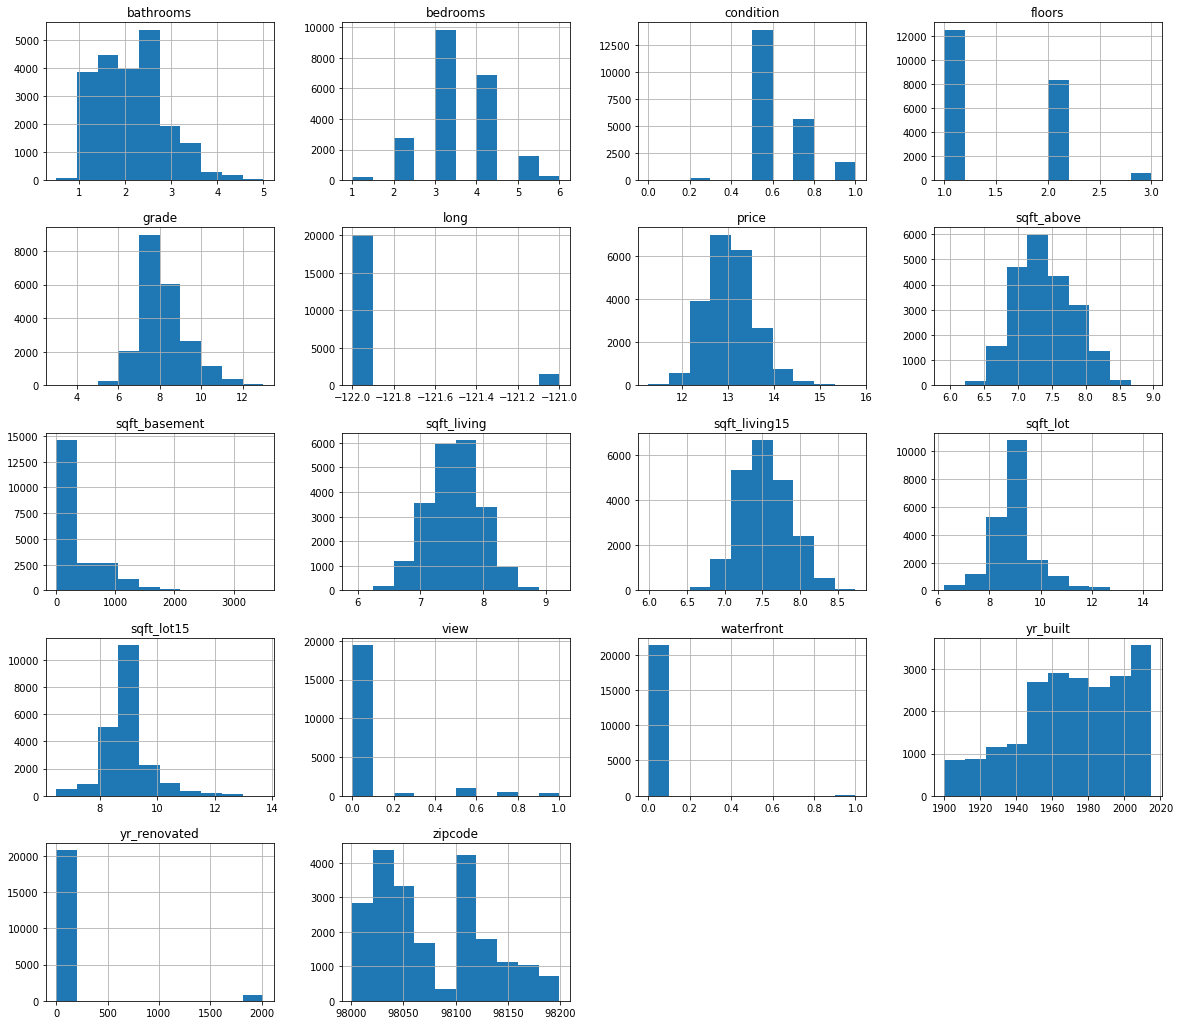

In [21]:
df.hist(figsize = (20,18));

#Remove bedrooms and bathrooms outliers

The data looks good, but looking at the heatmap and these histograms, it's apparent that all of the "sqft" variables are showing identical information and should be exluded from the final model. Also, we need to deal with "yr_built" and "yr_renovate", which wwe will do by turning it into an age, which is a more numerical value. 



For the yr_built, we will subtract the year from 2019:

In [22]:
df["Age_of_house"] = 2019 - df["yr_built"]
df["Age_of_renovations"] = 2019 - df["yr_renovated"]

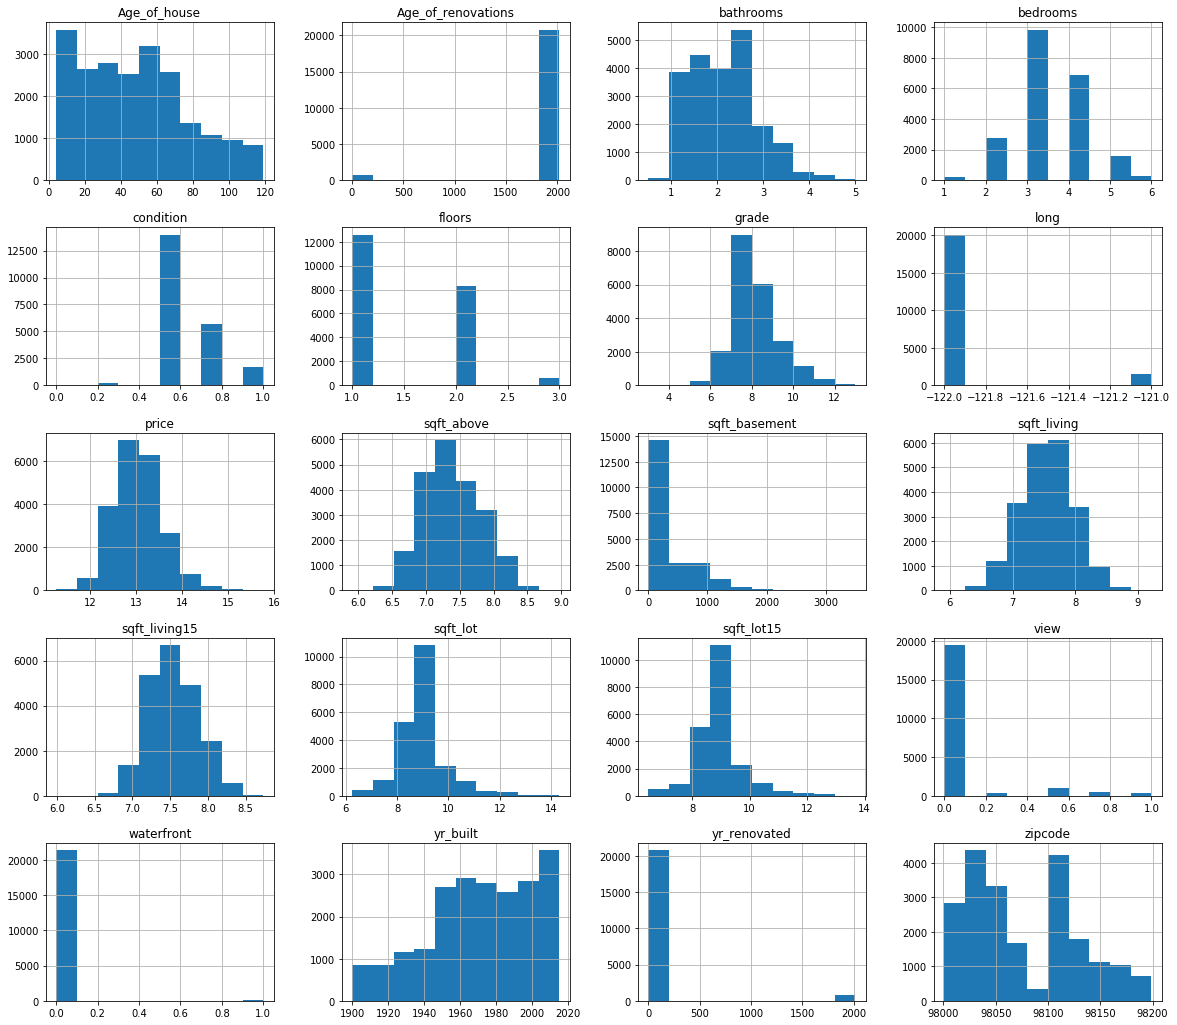

In [23]:
df.hist(figsize = (20,18));


Age_of_renovations doesn't have enought variability to be a useful variable. 

Next in transforming, is changing the variable type. "Waterfront" is a yes/no, so that should be a category. 

In [24]:
df.waterfront = df.waterfront.astype('category')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21499 entries, 0 to 21596
Data columns (total 21 columns):
date                  21499 non-null object
price                 21499 non-null float64
bedrooms              21499 non-null int64
bathrooms             21499 non-null float64
sqft_living           21499 non-null float64
sqft_lot              21499 non-null float64
floors                21499 non-null int64
waterfront            21499 non-null category
view                  21499 non-null float64
condition             21499 non-null float64
grade                 21499 non-null int64
sqft_above            21499 non-null float64
sqft_basement         21499 non-null float64
yr_built              21499 non-null int64
yr_renovated          21499 non-null int64
zipcode               21499 non-null int64
long                  21499 non-null int64
sqft_living15         21499 non-null float64
sqft_lot15            21499 non-null float64
Age_of_house          21499 non-null int64
Age_of_

Now, it's time to run the model. From the above testing, it's apparent that ID, yr_renovated, yr_built, lat and long, and all the sqft variables need to be removed. yr_renovated and yr_built are replaced with their "age" counterparts. 

In [26]:
df = df.drop(["yr_renovated", "Age_of_renovations" ,"yr_built", "long", "date","sqft_living", "sqft_basement","sqft_living15", "sqft_above", "sqft_lot", "sqft_lot15"], axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21499 entries, 0 to 21596
Data columns (total 10 columns):
price           21499 non-null float64
bedrooms        21499 non-null int64
bathrooms       21499 non-null float64
floors          21499 non-null int64
waterfront      21499 non-null category
view            21499 non-null float64
condition       21499 non-null float64
grade           21499 non-null int64
zipcode         21499 non-null int64
Age_of_house    21499 non-null int64
dtypes: category(1), float64(4), int64(5)
memory usage: 1.7 MB


In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [30]:
formula = "price ~ bedrooms + bathrooms + floors + waterfront +view + condition +grade +zipcode + Age_of_house"
model = ols(formula= formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     3863.
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:12:17   Log-Likelihood:                -6152.7
No. Observations:               21499   AIC:                         1.233e+04
Df Residuals:                   21489   BIC:                         1.241e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.8252      4.421     -0.639      0.523     -11.490       5.840
waterfront[T.1]     0.3521      0.029     11.989      0.000       0.295       0.410
bedrooms            0.0174      0.003      5.764      0.000       0.012       0.023
bathrooms           0.1659      0.005     34.936      0.000       0.157       0.175
floors              0.0613      0.005     11.405      0.000       0.051       0.072
view                0.2669      0.013     20.223      0.000       0.241       0.293
condition           0.1709      0.015     11.541      0.000       0.142       0.200
grade               0.2855      0.003    107.334      0.000       0.280       0.291
zipcode             0.0001   4.51e-05      2.890      0.004    4.19e-05       0.000
Age_of_house        0.0061      0.000     56.019      0.000       0.006       0.006
==============================================================================
Omnibus:                       62.361   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.898
Skew:                          -0.038   Prob(JB):                     7.37e-18
Kurtosis:                       3.287   Cond. No.                     1.97e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

All p-values are below .05, which means this data is significant. The R Squared value is .618, which on a scale from 0 (the model does not fit the data) to 1 (the model exactly fits the data), is not spectacular. We can see that "zipcode", "bedrooms" and "floors" should be removed from the model.  

In [48]:
df = df.drop(["floors", "bedrooms", "zipcode"], axis=1)

Now we will run recursive feature elimination to examine each varible's impact on the price of housing. We are looking for significant p values (below .05), and coefficents that are greater than .1. 

In [49]:
import statsmodels.formula.api as smf

In [50]:
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("df: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


df: price~bathrooms
------------------------------
['bathrooms', 0.2930642710295347, 12.249421118310588, 0.3774543428006526, 0.0]
df: price~view
------------------------------
['view', 0.11627408600107936, 12.990098542417666, 0.9349165448895106, 0.0]
df: price~condition
------------------------------
['condition', 0.0016117099782806399, 12.966552361370647, 0.12864620504005542, 3.8978838303875044e-09]
df: price~grade
------------------------------
['grade', 0.48763527587142186, 10.64633889404023, 0.3134289560378355, 0.0]
df: price~Age_of_house
------------------------------
['Age_of_house', 0.006379496394962381, 13.11213592838723, -0.0014181558490876135, 9.021657247712348e-32]


In [51]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bathrooms,0.293064,12.2494,0.377454,0
2,view,0.116274,12.9901,0.934917,0
3,condition,0.00161171,12.9666,0.128646,3.89788e-09
4,grade,0.487635,10.6463,0.313429,0
5,Age_of_house,0.0063795,13.1121,-0.00141816,9.02166e-32


The standards for significance and model fit are an R-squared value <0.2 and P Value greater than .05. These are dropped, although it is important to note that all P Values are within the acceptable range. 

In [52]:
col_names = df2.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("df2: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df2).fit()
    X_new = pd.DataFrame({val: [df2[val].min(), df2[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])


df2: price~bedrooms
------------------------------
['bedrooms', 0.11954494786348013, 12.35109343847061, 0.20641204486145975, 0.0]
df2: price~bathrooms
------------------------------
['bathrooms', 0.2930642710295347, 12.249421118310588, 0.3774543428006526, 0.0]
df2: price~view
------------------------------
['view', 0.11627408600107936, 12.990098542417666, 0.9349165448895106, 0.0]
df2: price~grade
------------------------------
['grade', 0.48763527587142186, 10.64633889404023, 0.3134289560378355, 0.0]
df2: price~Age_of_house
------------------------------
['Age_of_house', 0.006379496394962381, 13.11213592838723, -0.0014181558490876135, 9.021657247712348e-32]


In [53]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.119545,12.3511,0.206412,0
2,bathrooms,0.293064,12.2494,0.377454,0
3,view,0.116274,12.9901,0.934917,0
4,grade,0.487635,10.6463,0.313429,0
5,Age_of_house,0.0063795,13.1121,-0.00141816,9.02166e-32


In [55]:
formula = "price ~ bathrooms + view + grade + waterfront"
model = ols(formula= formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     6104.
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:27:38   Log-Likelihood:                -8340.0
No. Observations:               21499   AIC:                         1.669e+04
Df Residuals:                   21494   BIC:                         1.673e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.8750      0.017    630.396      0.000      10.841      10.909
waterfront[T.1]     0.3449      0.032     10.618      0.000       0.281       0.409
bathrooms           0.0947      0.004     21.822      0.000       0.086       0.103
view                0.4375      0.014     30.756      0.000       0.410       0.465
grade               0.2539      0.003     89.537      0.000       0.248       0.259
==============================================================================
Omnibus:                       44.757   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.966
Skew:                           0.110   Prob(JB):                     1.72e-10
Kurtosis:                       2.955   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, we run recurssive feature elimination. 

In [56]:
y = df["price"]
X = df.drop(["price"], axis=1)
X.head()

,bathrooms,waterfront,view,condition,grade,Age_of_house
0,1.00,0,0.0,0.5,7,64
1,2.25,0,0.0,0.5,7,68
2,1.00,0,0.0,0.5,6,86
3,3.00,0,0.0,1.0,7,54
4,2.00,0,0.0,0.5,8,32


In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [58]:
r_list = []
adj_r_list = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

0.5498951540717996
0.5497694966608759
0.6150278867867229
0.6149204127182659
0.6150278867867229
0.6149204127182659
0.6150278867867229
0.6149204127182659
0.6150278867867229
0.6149204127182659
0.6150278867867229
0.6149204127182659
0.6150278867867229
0.6149204127182659
0.6150278867867229
0.6149204127182659
0.6150278867867229
0.6149204127182659


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

0.12282287488205655
0.12017027127972134
0.10504239185229786
0.10281888284229068
0.10504239185229786
0.10281888284229068
0.10504239185229786
0.10281888284229068
0.10504239185229786
0.10281888284229068
0.10504239185229786
0.10281888284229068
0.10504239185229786
0.10281888284229068
0.10504239185229786
0.10281888284229068
0.10504239185229786
0.10281888284229068
